In [5]:
#Cargamos las librerias necesarias:
import pandas as pd
import datetime as dt
import numpy as np
import warnings # nobody likes warnings

import matplotlib.pyplot as plt
import seaborn as sns

# 🤖 Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error

pd.set_option('display.max_columns', None) # display all columns
warnings.filterwarnings('ignore') # ignore warnings

import sys
sys.path.append(r"C:\Users\FernandoSanz-Extreme\OneDrive - AMCHOR INVESTMENT STRATEGIES SGIIC, S.A\Escritorio\Ironhack\DATA_OCT24_MAD")
from functions import *
df = pd.read_csv("df4.csv")

In [14]:
df.describe()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_diff_neighbors,lot_diff_neighbors,price
count,2.160500e+04,21605.000000,21605.000000,21605.000000,21605.000000,2.160500e+04,21605.000000,21605.000000,21605.000000,21605.000000,21605.000000,21605.000000,21605.000000,21605.000000,21605.000000,21605.000000,21605.000000,21605.000000,2.160500e+04,2.160500e+04
mean,4.580131e+09,735535.189586,3.370562,2.115459,2079.928026,1.510896e+04,1.494145,0.007545,0.234205,3.409535,7.657070,291.590141,1971.003888,84.433511,98077.944966,47.560054,-122.213920,93.402731,2.340077e+03,5.400899e+05
std,2.876713e+09,113.043169,0.906101,0.769360,918.251764,4.142770e+04,0.539755,0.086533,0.766261,0.650525,1.174393,442.621517,29.373384,401.750320,53.507985,0.138562,0.140801,600.808762,2.891659e+04,3.671094e+05
min,1.000102e+06,735355.000000,0.000000,0.000000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,-2310.000000,-3.268790e+05,7.500000e+04
25%,2.123049e+09,735436.000000,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,-220.000000,-4.210000e+02,3.220000e+05
50%,3.904930e+09,735522.000000,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,0.000000,0.000000e+00,4.500000e+05
75%,7.308900e+09,735646.000000,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,310.000000,6.800000e+02,6.450000e+05
max,9.900000e+09,735745.000000,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,8690.000000,1.225778e+06,7.700000e+06


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Separate features and target
X = df.drop(columns=["price"])
y = df["price"]

# Separate data into train and test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, shuffle = True)

X_train_log = np.log1p(X_train)  
X_test_log = np.log1p(X_test)

In [13]:


model= xgb.XGBRFRegressor()
model.fit(X_train_log, y_train)
predictions = model.predict(X_test_log)

print(f"'R²' result = {r2_score(y_test, predictions)}")
print(f"'RMSE' result = {root_mean_squared_error(y_test, predictions)}")
print(f"'MSE' result = {mean_squared_error(y_test, predictions)}")
print(f"'MAE' result = {mean_absolute_error(y_test, predictions)}")

XGBoostError: [09:20:37] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\common\../data/gradient_index.h:94: Check failed: valid: Input data contains `inf` or a value too large, while `missing` is not set to `inf`

In [6]:
evaluate_regresion_model(data, "price", graphs=False, log=True).T

----------------------Data Normalized with Log Transform-------------------------


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [10]:
def evaluate_regresion_model2(df, target, size=0.3, random=42, shuff=True, round_digits=4, graphs=True, stand=False, log=False):
    """
    Function to automatically evaluate ML regression models and returns a df with the comparison,
    now including subplots for Actual vs. Predicted for each model.
    """
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.pipeline import make_pipeline
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
    from sklearn.svm import SVR
    from sklearn.neural_network import MLPRegressor
    from sklearn.preprocessing import StandardScaler
    import xgboost as xgb
    from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_error
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    import math

    # Definition of the models
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(),
        'Lasso Regression': Lasso(),
        'Elastic Net Regression': ElasticNet(),
        'Polynomial Regression (degree=2)': make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
        'Decision Tree Regression': DecisionTreeRegressor(),
        'Random Forest Regression': RandomForestRegressor(),
        'K-Nearest Neighbors Regression': KNeighborsRegressor(),
        'Support Vector Regression': SVR(),
        'Neural Network Regression': MLPRegressor(max_iter=500),
        'Bayesian Regression': BayesianRidge(),
        'Gradient Boosting Regression': GradientBoostingRegressor(),
        'XGBoost Regression': xgb.XGBRegressor(),
        'XGBRF Regression': xgb.XGBRFRegressor()
    }

    metrics = {        
        'Model': [],
        'R²': [],
        'RMSE': [],
        'MSE': [],
        'MAE': []
    }

    # Separate features and target
    X = df.drop(columns=[target])
    y = df[target]

    # Separate data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=random, shuffle=shuff)

    # Normalization with StandardScaler
    if stand:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        print("----------------------Data Normalized with Standard Scaler-------------------------")

    # Normalization with Log Transform
    if log:
        X_train = np.log1p(X_train)
        X_test = np.log1p(X_test)
        print("----------------------Data Normalized with Log Transform-------------------------")

    # Run all the models and store the results
    predictions_dict = {}
    for key, model in models.items():
        print(key)
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        metrics['Model'].append(key)
        metrics['R²'].append(r2_score(y_test, predictions))
        metrics['RMSE'].append(np.sqrt(mean_squared_error(y_test, predictions)))
        metrics['MSE'].append(mean_squared_error(y_test, predictions))
        metrics['MAE'].append(mean_absolute_error(y_test, predictions))
        predictions_dict[key] = predictions

    # Convert metrics to DataFrame
    df_metrics = round(pd.DataFrame(metrics), round_digits).set_index("Model").T

    # Plot subplots for Actual vs. Predicted if graphs=True
    if graphs:
        n_models = len(models)
        nrows = math.ceil(n_models / 3)  # Adjust row count to have 3 plots per row
        fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(20, 5 * nrows))
        axes = axes.flatten()

        for i, (key, predictions) in enumerate(predictions_dict.items()):
            comparison_df = pd.DataFrame({'actual': y_test, 'predictions': predictions}).reset_index(drop=True)
            sns.regplot(x='actual', y='predictions', data=comparison_df, scatter_kws={"color": "#FF6347", "alpha": 0.7},
                        line_kws={"color": "#FF8C00", "linewidth": 3}, ax=axes[i])
            axes[i].set_title(f'{key}')
            axes[i].set_xlabel('Actual')
            axes[i].set_ylabel('Predictions')

        # Hide any empty subplots if n_models is not a multiple of 3
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout()
        plt.show()

    return df_metrics


Linear Regression
Ridge Regression
Lasso Regression
Elastic Net Regression
Polynomial Regression (degree=2)
Decision Tree Regression
Random Forest Regression
K-Nearest Neighbors Regression
Support Vector Regression
Neural Network Regression
Bayesian Regression
Gradient Boosting Regression
XGBoost Regression
XGBRF Regression


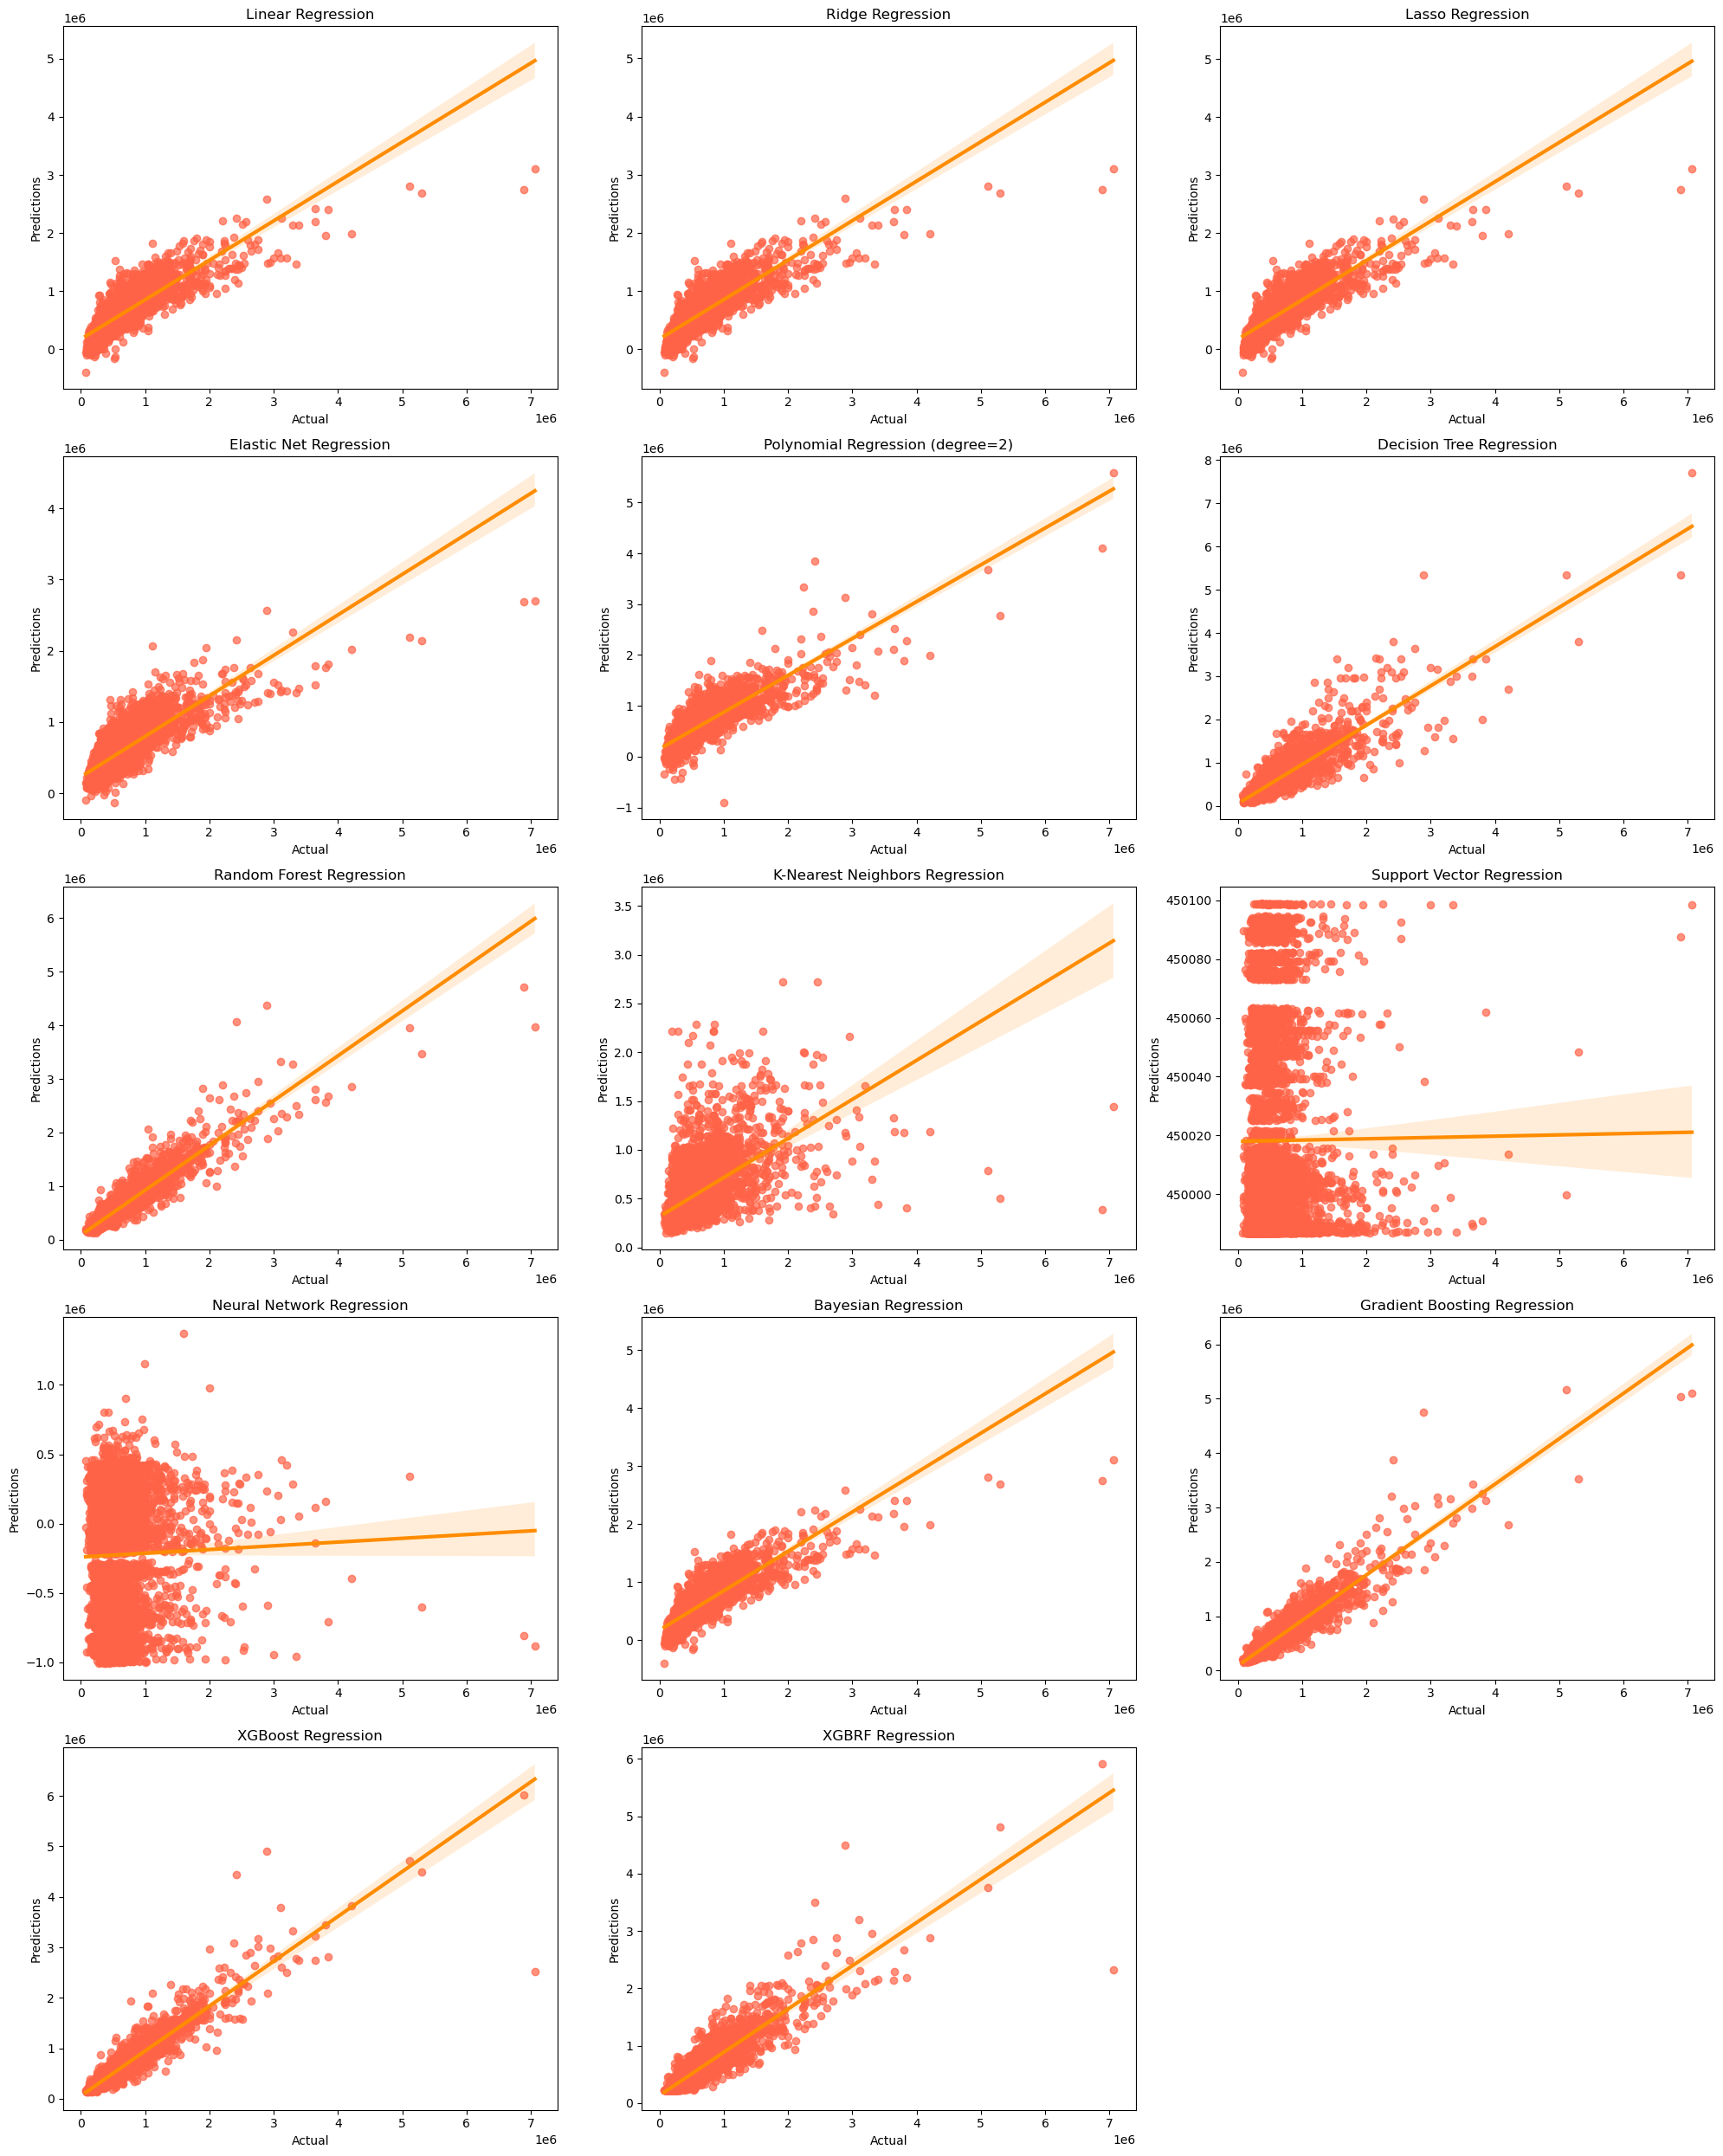

,R²,RMSE,MSE,MAE
Model,,,,
Linear Regression,0.7035,206670.2834,4.271261e+10,126046.9144
Ridge Regression,0.7034,206694.8996,4.272278e+10,126019.3505
Lasso Regression,0.7035,206671.0820,4.271294e+10,126045.8162
Elastic Net Regression,0.6187,234355.0905,5.492231e+10,145383.2462
Polynomial Regression (degree=2),0.7035,206655.5814,4.270653e+10,133163.7650
Decision Tree Regression,0.7641,184350.4986,3.398511e+10,102397.1106
Random Forest Regression,0.8749,134246.4813,1.802212e+10,70054.5029
K-Nearest Neighbors Regression,0.3078,315772.9506,9.971256e+10,165066.7453
Support Vector Regression,-0.0620,391135.5489,1.529870e+11,224905.6144


In [11]:
evaluate_regresion_model2(df, "price", graphs=True).T